
# NLP (Natural Language Processing) with Python

we will discuss a higher level overview of the basics of Natural Language Processing, which basically consists of combining machine learning techniques with text, and using math and statistics to get that text in a format that the machine learning algorithms can understand!

In [1]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

        C:\Users\Acer\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


        C:\Users\Acer\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


KeyboardInterrupt: Interrupted by user

We'll be using a dataset from the [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)! This dataset is already located in the folder for this section.

The file we are using contains a collection of more than 5 thousand SMS phone messages. You can check out the **readme** file for more info.

Let's go ahead and use rstrip() plus a list comprehension to get a list of all the lines of text messages:

In [3]:
messages=[line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [17]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [18]:
# so messages is a tab seprated file

In [6]:
# print out first 10 messages
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,messages)
    print('\n')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [16]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

Due to the spacing we can tell that this is a [TSV](http://en.wikipedia.org/wiki/Tab-separated_values) ("tab separated values") file, where the first column is a label saying whether the given message is a normal message (commonly known as "ham") or "spam". The second column is the message itself. (Note our numbers aren't part of the file, they are just from the **enumerate** call).

Using these labeled ham and spam examples, we'll **train a machine learning model to learn to discriminate between ham/spam automatically**. Then, with a trained model, we'll be able to **classify arbitrary unlabeled messages** as ham or spam.

From the official SciKit Learn documentation, we can visualize our process:

Instead of parsing TSV manually using Python, we can just take advantage of pandas! Let's go ahead and import it!

In [19]:
import pandas as pd

In [20]:
messages=pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [21]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [22]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [23]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [24]:
messages['length']=messages['message'].apply(len)

In [25]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
messages.loc[1]

label                                ham
message    Ok lar... Joking wif u oni...
length                                29
Name: 1, dtype: object

In [30]:
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import cufflinks as cf
cf.go_offline()
%matplotlib inline

In [35]:
messages['length'].iplot(kind='hist')

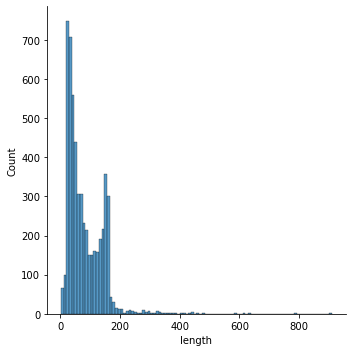

In [40]:
sb.displot(messages['length'],bins=100)

In [42]:
messages['length'].describecribe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [43]:
messages[messages['length']==910]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


In [44]:
messages[messages['length']==910]['message']

1085    For me the love should start with attraction.i...
Name: message, dtype: object

In [46]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [56]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

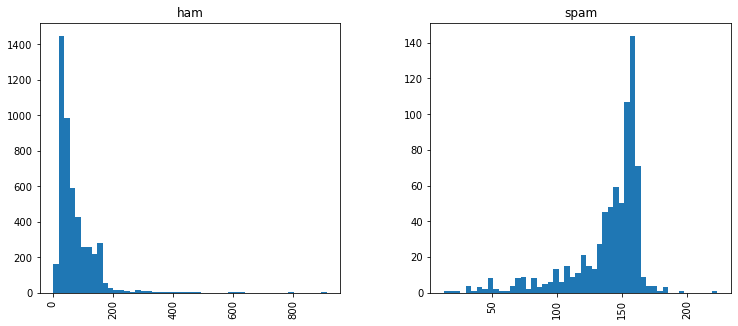

In [62]:
messages.hist(column='length',by='label',bins=50,figsize=(12,5))

Very interesting! Through just basic EDA we've been able to discover a trend that spam messages tend to have more characters. (Sorry Romeo!)

Now let's begin to process the data so we can eventually use it with SciKit Learn!

## Text Pre-processing

### convert seq of character to seq of numbers

Our main issue with our data is that it is all in text format (strings). The classification algorithms that we've learned about so far will need some sort of numerical feature vector in order to perform the classification task. There are actually many methods to convert a corpus to a vector format. The simplest is the the [bag-of-words](http://en.wikipedia.org/wiki/Bag-of-words_model) approach, where each unique word in a text will be represented by one number.


In this section we'll convert the raw messages (sequence of characters) into vectors (sequences of numbers).

As a first step, let's write a function that will split a message into its individual words and return a list. We'll also remove very common words, ('the', 'a', etc..). To do this we will take advantage of the NLTK library. It's pretty much the standard library in Python for processing text and has a lot of useful features. We'll only use some of the basic ones here.

Let's create a function that will process the string in the message column, then we can just use **apply()** in pandas do process all the text in the DataFrame.

First removing punctuation. We can just take advantage of Python's built-in **string** library to get a quick list of all the possible punctuation:

In [63]:
import string

In [64]:
mess='sample message! Notice: it has punctuation.'

In [65]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [67]:
# list comprihension
nopunc=[ c for c in mess if c not in string.punctuation]

In [69]:
print(nopunc)

['s', 'a', 'm', 'p', 'l', 'e', ' ', 'm', 'e', 's', 's', 'a', 'g', 'e', ' ', 'N', 'o', 't', 'i', 'c', 'e', ' ', 'i', 't', ' ', 'h', 'a', 's', ' ', 'p', 'u', 'n', 'c', 't', 'u', 'a', 't', 'i', 'o', 'n']


In [70]:
from nltk.corpus import stopwords

In [72]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [73]:
nopunc=''.join(nopunc)

In [74]:
nopunc

'sample message Notice it has punctuation'

In [82]:
x=['a','b','c','d']

In [83]:
'++'.join(x)

'a++b++c++d'

In [84]:
nopunc.split()

['sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [85]:
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [86]:
clean_mess

['sample', 'message', 'Notice', 'punctuation']

In [91]:
def text_process(mess):
    """"
    1.remove punc
    2.remove stop words
    3.return list of clean text words
    """
    nonpunc=[char for char in mess if  char not in string.punctuation]
    
    nopun=''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [92]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [93]:
messages['message'].head().apply(text_process)

0    [sample, message, Notice, punctuation]
1    [sample, message, Notice, punctuation]
2    [sample, message, Notice, punctuation]
3    [sample, message, Notice, punctuation]
4    [sample, message, Notice, punctuation]
Name: message, dtype: object

In [116]:
# running ran run returns run 

Now let's "tokenize" these messages. Tokenization is just the term used to describe the process of converting the normal text strings in to a list of tokens (words that we actually want).

Let's see an example output on on column:

**Note:**
We may get some warnings or errors for symbols we didn't account for or that weren't in Unicode (like a British pound symbol)

### Continuing Normalization

There are a lot of ways to continue normalizing this text. Such as [Stemming](https://en.wikipedia.org/wiki/Stemming) or distinguishing by [part of speech](http://www.nltk.org/book/ch05.html).

NLTK has lots of built-in tools and great documentation on a lot of these methods. Sometimes they don't work well for text-messages due to the way a lot of people tend to use abbreviations or shorthand, For example:
    
    'Nah dawg, IDK! Wut time u headin to da club?'
    
versus

    'No dog, I don't know! What time are you heading to the club?'
    
Some text normalization methods will have trouble with this type of shorthand and so I'll leave you to explore those more advanced methods through the [NLTK book online](http://www.nltk.org/book/).

For now we will just focus on using what we have to convert our list of words to an actual vector that SciKit-Learn can use.

# Vectorisation

Currently, we have the messages as lists of tokens (also known as [lemmas](http://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)) and now we need to convert each of those messages into a vector the SciKit Learn's algorithm models can work with.

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:

1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

Let's begin the first step:

Each vector will have as many dimensions as there are unique words in the SMS corpus.  We will first use SciKit Learn's **CountVectorizer**. This model will convert a collection of text documents to a matrix of token counts.

We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message. 

For example:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a [Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix).

In [102]:
from sklearn.feature_extraction.text import CountVectorizer

There are a lot of arguments and parameters that can be passed to the CountVectorizer. In this case we will just specify the **analyzer** to be our own previously defined function:

In [118]:
cv=CountVectorizer()

In [167]:
bow_transformer=cv.fit(messages['message'])

In [168]:
print(len(cv.vocabulary_))

8713


In [169]:
mess4=messages['message'][3]

In [170]:
print(mess4)

U dun say so early hor... U c already then say...


In [171]:
bow4=cv.transform([mess4])

In [172]:
print(bow4)

  (0, 1054)	1
  (0, 2815)	1
  (0, 2836)	1
  (0, 3952)	1
  (0, 6679)	2
  (0, 7074)	1
  (0, 7688)	1


This means that there are seven unique words in message number 4 (after removing common stop words). Two of them appear twice, the rest only once. Let's go ahead and check and confirm which ones appear twice:

In [127]:
bow4.shape

(1, 8713)

In [128]:
cv.get_feature_names()[6679]

'say'

In [134]:
cv.get_feature_names()[7688]

'then'

In [152]:
cv2=CountVectorizer(analyzer=text_process)

In [153]:
cv2.fit(messages['message'])

CountVectorizer(analyzer=<function text_process at 0x0000015B45C21430>)

In [154]:
print(len(cv2.vocabulary_))

4


In [150]:
bow5=cv2.transform([mess4])

In [151]:
print(bow5)

  (0, 2)	10
  (0, 16)	6
  (0, 40)	5
  (0, 42)	1
  (0, 43)	2
  (0, 44)	3
  (0, 47)	2
  (0, 51)	2
  (0, 53)	2
  (0, 54)	2
  (0, 57)	3
  (0, 58)	3
  (0, 59)	1
  (0, 60)	3
  (0, 64)	4


In [140]:
bow5.shape

(1, 90)

In [146]:
cv2.get_feature_names()[57]

'r'

In [155]:
messages_bow=cv.transform(messages['message'])

In [157]:
print('Shape of Spars Matrix: ', messages_bow.shape)

Shape of Spars Matrix:  (5572, 8713)


In [158]:
# Amount of non zero occurances
messages_bow.nnz

74169

In [159]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


# TF-IDF

After the counting, the term weighting and normalization can be done with [TF-IDF](http://en.wikipedia.org/wiki/Tf%E2%80%93idf), using scikit-learn's `TfidfTransformer`.

____
### So what is TF-IDF?
TF-IDF stands for *term frequency-inverse document frequency*, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

**TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*

See below for a simple example.

**Example:**

Consider a document containing 100 words wherein the word cat appears 3 times. 

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.
____

Let's go ahead and see how we can do this in SciKit Learn:

In [180]:
from sklearn.feature_extraction.text import TfidfTransformer

In [186]:
tfidf_transformer=TfidfTransformer().fit(messages_bow)

In [187]:
tfidf4=tfidf_transformer.transform(bow4)

In [188]:
print(tfidf4)

  (0, 7688)	0.23932339200131514
  (0, 7074)	0.20366517080216648
  (0, 6679)	0.5877104328159917
  (0, 3952)	0.48883827585496475
  (0, 2836)	0.3531363589768002
  (0, 2815)	0.32530327883363347
  (0, 1054)	0.29385521640799583


We'll go ahead and check what is the IDF (inverse document frequency) of the word `"u"` and of word `"university"`?

In [189]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.239394426449646

To transform the entire bag-of-words corpus into TF-IDF corpus at once:

In [190]:
messages_tfidf=tfidf_transformer.transform(messages_bow)

There are many ways the data can be preprocessed and vectorized. These steps involve feature engineering and building a "pipeline". I encourage you to check out SciKit Learn's documentation on dealing with text data as well as the expansive collection of available papers and books on the general topic of NLP.

In [191]:
 from sklearn.naive_bayes import MultinomialNB

In [193]:
spam_model=MultinomialNB().fit(messages_tfidf,messages['label'])

In [194]:
spam_model.predict(tfidf4)[0]

'ham'

In [196]:
messages['label'][3]

'ham'

In [197]:
all_pred=spam_model.predict(messages_tfidf)
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [198]:
from sklearn.model_selection import train_test_split

In [201]:
msg_train, msg_test,label_train, label_test = train_test_split( messages['message'],messages['label'], test_size=0.3)

In [202]:
msg_train

3492                                                  Ok.
4434    Can u look 4 me in da lib i got stuff havent f...
5275                        Oh yeah clearly it's my fault
2504    Fwiw the reason I'm only around when it's time...
2931                    Wat's my dear doing? Sleeping ah?
                              ...                        
538     Or maybe my fat fingers just press all these b...
4872                  Well. You know what i mean. Texting
2076    Must come later.. I normally bathe him in da a...
481                          Almost there, see u in a sec
200              Found it, ENC  &lt;#&gt; , where you at?
Name: message, Length: 3900, dtype: object

In [203]:
# insted of doing all the above process in steps sklearn have
# a tool called pipeline

In [204]:
from sklearn.pipeline import Pipeline

In [206]:
pipeline=Pipeline([
    ('bow',CountVectorizer()),
    ('tfdif',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [207]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfdif', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [209]:
predc=pipeline.predict(msg_test)

In [210]:
from sklearn.metrics import classification_report,confusion_matrix

In [212]:
print(confusion_matrix(label_test,predc))
print('\n')
print(classification_report(label_test,predc))

[[1436    0]
 [  83  153]]


              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1436
        spam       1.00      0.65      0.79       236

    accuracy                           0.95      1672
   macro avg       0.97      0.82      0.88      1672
weighted avg       0.95      0.95      0.95      1672



In [220]:
# now lets try some other Classifier

The test size is 20% of the entire dataset (1115 messages out of total 5572), and the training is the rest (4457 out of 5572). Note the default split would have been 30/70.

## Creating a Data Pipeline

Let's run our model again and then predict off the test set. We will use SciKit Learn's [pipeline](http://scikit-learn.org/stable/modules/pipeline.html) capabilities to store a pipeline of workflow. This will allow us to set up all the transformations that we will do to the data for future use. Let's see an example of how it works:

In [214]:
from sklearn.ensemble import RandomForestClassifier

In [216]:
pipeline2=Pipeline([
    ('bow',CountVectorizer()), # strings to token integer counts
    ('tfdif',TfidfTransformer()), # integer counts to weighted TF-IDF scores
    ('classifier',RandomForestClassifier()) # train on TF-IDF vectors w/ Naive Bayes classifier
])

Now we can directly pass message text data and the pipeline will do our pre-processing for us! We can treat it as a model/estimator API:

In [217]:
pipeline2.fit(msg_train,label_train)
predct=pipeline2.predict(msg_test)

In [219]:
print(confusion_matrix(label_test,predct))
print('\n')
print(classification_report(label_test,predct))

[[1436    0]
 [  44  192]]


              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1436
        spam       1.00      0.81      0.90       236

    accuracy                           0.97      1672
   macro avg       0.99      0.91      0.94      1672
weighted avg       0.97      0.97      0.97      1672



In [221]:
# we can see random forest did better than multinomial

Now we have a classification report for our model on a true testing set! There is a lot more to Natural Language Processing than what we've covered here.